In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from gplearn.genetic import SymbolicRegressor



data_final=pd.read_csv("./DATA_LDH.csv")  
data=data_final.iloc[:,:-1]
target=data_final.iloc[:,-1]



X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=2)


transfer=StandardScaler()
X_train=transfer.fit_transform(X_train)
X_test=transfer.transform(X_test)

In [2]:
func=["add","sub","mul","div","sqrt","log","inv","cos","sin"]

gp = SymbolicRegressor(population_size=5000,
                           generations=50, stopping_criteria=0.3,metric="mean absolute error",
                           p_crossover=0.65, p_subtree_mutation=0.1,
                           p_hoist_mutation=0.03, p_point_mutation=0.1,function_set=func,
                           verbose=1,tournament_size=20,
                           parsimony_coefficient=0.0005, 
                           random_state=3)
gp.fit(X_train,y_train)

print(gp.score(X_test,y_test)) 
print(gp._program) 


y_train_predict=gp.predict(X_train)
y_test_predict=gp.predict(X_test)

MSE_train=mean_squared_error(y_train,y_train_predict)
MSE_test=mean_squared_error(y_test,y_test_predict)
print("-------------------------\n")
print("-------------------------\n")
print("TRAIN_MSE:\n",MSE_train)
print("TEST_MSE:\n",MSE_test)

r2_score_train=r2_score(y_train,y_train_predict)
r2_score_test=r2_score(y_test,y_test_predict)
print("TRAIN_R2:\n",r2_score_train)
print("TEST_R2:\n",r2_score_test)
print("-------------------------\n")
print("-------------------------\n")

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     9.16           13.012       30          1.83512              N/A      3.14m
   1    10.00          6.41794       27          1.51842              N/A      3.34m
   2    15.71           6.7184       37          1.48348              N/A      3.57m
   3    24.78          4.23121       23          1.14951              N/A      3.86m
   4    29.43          3.14384       22          1.03967              N/A      3.95m
   5    31.08          3.02044       27         0.980295              N/A      4.06m
   6    31.07          3.20504       26         0.890177              N/A      3.94m
   7    29.54           3.6771       25         0.752246              N/A      3.94m
   8    25.61          3.55879       29         0.711492              N/A  

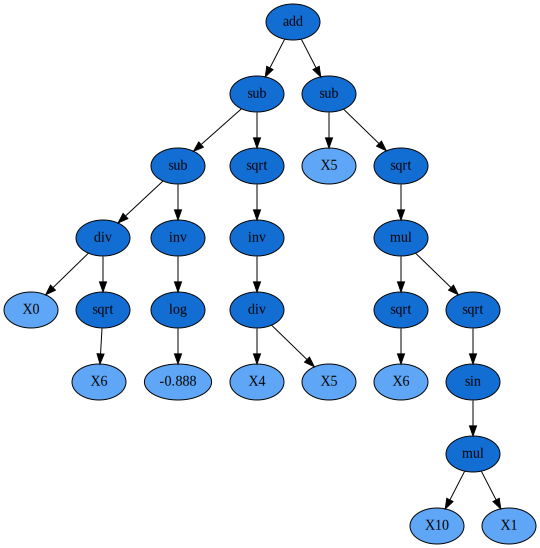

In [3]:
import graphviz
dot_data=gp._program.export_graphviz()
graph=graphviz.Source(dot_data)
graph

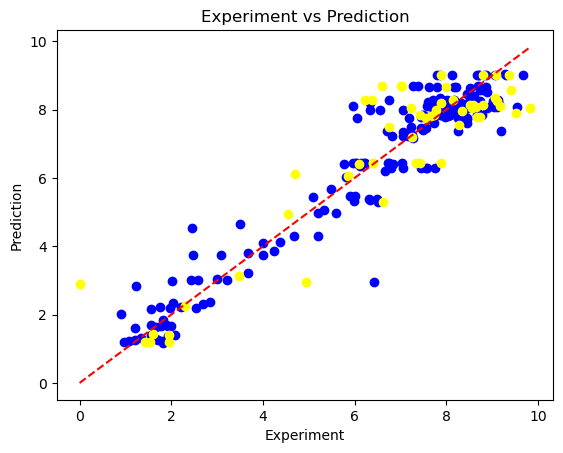

In [4]:
plt.scatter(y_train, y_train_predict,color='blue',label='train')
plt.scatter(y_test, y_test_predict,color='yellow',label='test')
plt.title('Experiment vs Prediction')
plt.xlabel('Experiment')
plt.ylabel('Prediction')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()